#DBSCAN

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\Geethanzali\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        Day of Week (Sunday is 1)  Hour of Day  Longitude   Latitude
0                               4           19 -83.076683  42.437055
1                               1           21 -82.949356  42.389847
2                               4            0 -83.052751  42.436044
3                               4           14 -82.927686  42.423928
4                               3           20 -83.256068  42.412022
5                               4           19 -82.942358  42.412448
6                               3           12 -83.020961  42.438004
7                               5            4 -83.153440  42.441230
8                               5            0 -83.124027  42.410382
9                               4            0 -83.047675  42.327087
10                              2           16 -83.140318  42.405483
11                              4           22 -83.068569  42.425835
12                              2            7 -83.068569  42.425835
13                              5 

2

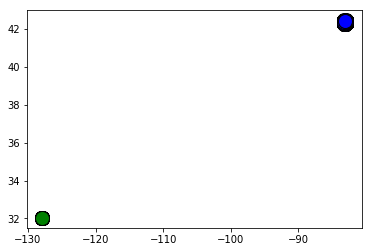

In [14]:
import pandas as pd
location=r'DPD__All_Crime_Incidents__December_6__2016_-_Present.csv'
ml = pd.read_csv(location)
ml= ml.iloc[:,4:21]
ml= ml.drop(['Charge Description','Incident Time (24h)','State Offense Code', 'Incident Date & Time','Arrest Charge','Zip Code','Year','Scout Car Area','Precinct Number','Neighborhood','Council District','Census Block GEOID'], axis=1)
ml = ml.dropna()
x=ml.iloc[:,1:5]
print(x)

db_x= x.iloc[:,2:4]
#d_x=db_x.drop(df.index[750])
db_x=db_x[:13000]
df = db_x.values
print(df)


import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=5, min_samples=10).fit(df)
core_samples = db.core_sample_indices_
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#print(set(labels))

import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.clf()

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    
    #print(class_members)
    for index in class_members:
        x = df[index]
        if index in core_samples and k != -1:
            markersize = 14
        else:
            markersize = 6
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=markersize)
        


n_clusters

{0, 1}


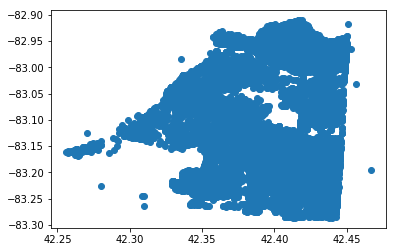

In [3]:
print (set(labels))

a=np.where(labels==0)

x_data_plot=[]
y_data_plot=[]

i=0
for i in a[i]:
    x_data_plot.append(df[i][0])
    y_data_plot.append(df[i][1])
    i=i+1
    
pl.plot(y_data_plot,x_data_plot,'o')

x_data_plot=np.asarray(x_data_plot)
y_data_plot= np.asarray(y_data_plot)

dataset = pd.DataFrame({'Lat': x_data_plot, 'Long':y_data_plot }, columns=['Lat', 'Long'])

d = dataset.values

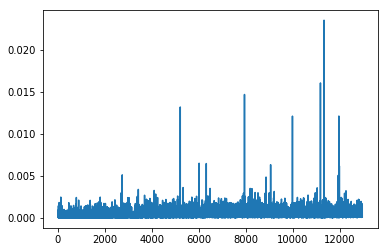

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
neigh.fit(dataset) 
neigh.kneighbors_graph(dataset)

nbrs = NearestNeighbors(n_neighbors=3).fit(d)
distances, indices = nbrs.kneighbors(d)

a=np.mean(distances, axis=1)
b=l = [i for i in range(12964)]

plt.plot(b,a)
 
#distances


26

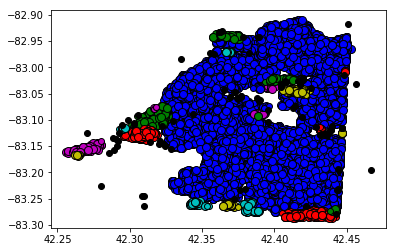

In [5]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.0038, min_samples=5).fit(d)
core_samples = db.core_sample_indices_
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#print(set(labels))

import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.clf()

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    
    #print(class_members)
    for index in class_members:
        x = d[index]
        if index in core_samples and k != -1:
            markersize = 8
        else:
            markersize = 6
        pl.plot(x[1], x[0], 'o', markerfacecolor=col,markeredgecolor='k', markersize=markersize)
        


n_clusters
